In [2]:
% matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

colleges = pd.read_csv('data/colleges.csv')

def college_id_cleaner(ser):
    '''returns identifier COLLEGE_ID as an integer type'''
    return ser.astype(int)

def pct_fed_loan_cleaner(ser):
    '''returns PCT_FED_LOAN as a proportion between 0 and 1.'''
    return ser.str.strip('%').astype(float) / 100

def median_grad_debt_cleaner(ser):
    '''returns MEDIAN_GRAD_DEBT as a float (in USD)'''
    return ser.replace('PrivacySuppressed', np.NaN).str.strip('$').astype(float)

def setting_cleaner(ser):
    '''returns SETTING column as a category data-type
    ordered as RURAL < SUBURBAN < CITY < URBAN'''
    values = ['Rural', 'Suburban', 'City', 'Urban']
    values = ['Rural', 'Urban']
    setting_dtype = pd.CategoricalDtype(categories=values, ordered=True)
    return ser.astype(setting_dtype)

csc_cleaning_map = {
    'COLLEGE_ID': college_id_cleaner,
    'PCT_FED_LOAN': pct_fed_loan_cleaner,
    'MEDIAN_GRAD_DEBT': median_grad_debt_cleaner,
    'SETTING': setting_cleaner
}

csc_cleaning_map = {x: csc_cleaning_map.get(x, lambda x:x) for x in colleges.columns}

colleges = colleges.agg(csc_cleaning_map)


# Exploratory Data Analysis (EDA): Part I
---

Exploratory Data Analysis (EDA) is the process of acquainting oneself with a dataset, in order to understand the observations it contains and assess those contents with respect to what is understood of the data generating process. Such an initial investigation informs subtle decisions in data cleaning, the sorts of questions the dataset can address, and the scope of events to which the dataset applies. 

An EDA immediately follows the basic steps of data cleaning and attempts to succinctly summarize a dataset with easily understandable tables and visualizations.

The start of any EDA begins with visual summaries of each attribute, taking care to describe:
* the shape of the data, using distributions,
* where most the data lie, using percentiles, and
* any outliers that may distort other descriptions.

An EDA should proceed attribute-by-attribute, carefully summarizing the observations described above.

### Introduction to Seaborn

[Seaborn](https://seaborn.pydata.org/) is a python plotting library that provides a convenient API for plotting common statistical summaries. Seaborn is typically imported as:
```
import seaborn as sns
```

The following plots are convenient for understanding the *univariate* statistics relevant to this section:
* `distplot` plots the distribution of an attribution in three possible ways:
    - a histogram with a specified number of bins,
    - a density plot to estimate the overall shape of the distribution,
    - a rug plot that plots individual data points as tick marks (for spotting outliers).
* `boxplot` displays the quartiles of an attribute, along with the minimum and maximum values.
* `countplot` displays the categorical distribution of an attribute as a bar chart.

### EDA on the college scorecard data

Recall that the college scorecard data contains individual observations about colleges across the United States. The dataset analyzed below contains a small subset of attributes describing each college. 

Included below is a short investigation into two variables in the dataset. A thorough EDA would systematically approach every column.

The quantitative attribute **MEDIAN_GRAD_DEBT** describes the median debt of students at each school upon graduation. The plot of the distribution shows:
* Two modes for median student debt near \\$10000 and \\$26000,
* A few colleges with median student debt above \\$50000.
* The box-plot reveals that approximately 50\% of the colleges have median student debt between the two modes seen in the distribution.

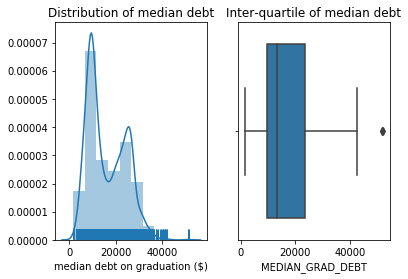

In [4]:
fig, (dist, box) = plt.subplots(1, 2)

# distribution plot
dist.set_title('Distribution of median debt')
sns.distplot(
    colleges['MEDIAN_GRAD_DEBT'].values, 
    bins=10, hist=True, kde=True, rug=True,
    axlabel='median debt on graduation ($)',
    ax=dist
)

# box plot
box.set_title('Inter-quartile of median debt')
sns.boxplot(colleges['MEDIAN_GRAD_DEBT'], ax=box);

Investigating the outliers shows three colleges with a median debt of over \\$50000; two of these colleges are clearly related. This raises a question of data quality: have these schools have pooled their statistics across both campuses? Or are they coincidentally the same?

In [45]:
colleges.loc[colleges.MEDIAN_GRAD_DEBT > 50000]

,COLLEGE_ID,NAME,UNDERGRAD_POP,PCT_FED_LOAN,MEDIAN_GRAD_DEBT,SETTING
79,2491500,Southwest University of Visual Arts-Tucson,125.0,0.9242,51488.5,Urban
4122,2491501,Southwest University of Visual Arts-Albuquerque,66.0,0.9277,51488.5,Urban
4619,3513400,Apex School of Theology,646.0,0.9208,52000.0,Urban


The categorical attribute **SETTING** describes the environment (urban or rural) in which the college is located. The distribution of settings reveals that approximately 85% of the colleges are located in an urban environment:

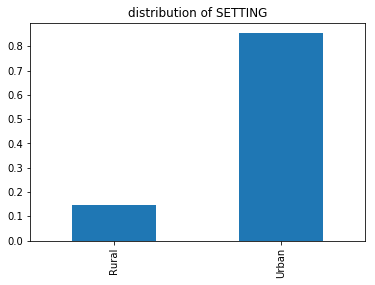

In [5]:
(
    colleges['SETTING']
    .value_counts(normalize=True)
    .sort_index()
    .plot(kind='bar', title='Distribution of SETTING')
);